### Module 1: Initial imports and importing the dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

NumPy is a Python library used for working with arrays. We will be using to find unique values in a column such as userID, to find out the number of users who have provided the reviews.

Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively.  The read_csv() function in the panadas library will be used to retrieve data from the csv file.

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. We will be maily using it's factorplot() method to draw a categorical plot of the preprocessed data

First, we load the dataset and add headers for the columns of the dataset. Here we are working with a dataset containing the reviews from customers.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

review_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon_review_data.csv', names=['userId', 'productId','Rating','timestamp'])
review_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### Module 2: Initial Data Analysis and Anomaly Detection

Here we will explore the dataset to get a feel of what the dataset has to offer and also detect issues with the dataset which we will be required to fix to allow for proper usage of the data to prepare the models and generate proper results. We will first have a look at the shape of the data. The shape of the dataset gives us the number of rows and columns in the dataset.

In [18]:
#Shape of the data
review_data.shape

(7824482, 4)

Next, we will have a look at the data types of the data. This is essential, so that we do not face any difficulties in a later stage when we will be dealing with the data.

In [19]:
review_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

Next, we will have a deeper look at the data types and storage requirements of the data.

In [20]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


Now, we will have a look at a summary of the 'Rating' column. We will get results about the data such as mean, median, mode, 1st quartile, 3rd quartile to name a few. This helps us understand the distribution of the data and helps us detect potential anomalies.

In [21]:
review_data.describe()['Rating'].T

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

We will now have a look at the min and max values of the 'Rating' column. We are only dealing with reviews having rating values from 1-5, so if we find values outside the above stated range, we will have to deal with those entries.

In [22]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(review_data.Rating.min()))
print('Maximum rating is: %d' %(review_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


### Module 3: Preprocessing and Handling Missing Values

We will firstly check for null entries. Null entries need to be dealt with as they interfere with the results.

In [23]:
#Check for missing values
print('Number of missing values across columns: \n',review_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


We observe that there are no null values in the dataset. That is a good sign as it implies that it is a good dataset and we are not required to synthesize data or look for other methods to fill the null values. We will now visualize the ratings to see if there are any anomalies. We do this because ratings is the central basis of our models and we need to ensure the data is proper.

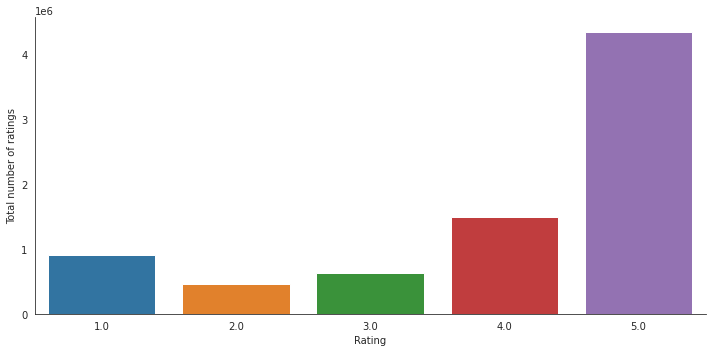

In [24]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=review_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Analyzing the data

In [25]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",review_data.shape[0])
print("Total No of Users   :", len(np.unique(review_data.userId)))
print("Total No of products  :", len(np.unique(review_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users   : 4201696
Total No of products  : 476002


We then drop the timestamp column, as after going over the data, we realise that for our models, the key data point is the ratings column and timestamp does not hold importance.

In [4]:
#Dropping the Timestamp column

review_data.drop(['timestamp'], axis=1,inplace=True)

Analyzing the rating

In [27]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = review_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [28]:
no_of_rated_products_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

Next steps - from these actions, we were able to clean the data and prepare it to be applied to create a model. Looking at the results, we have to decided to attempt to build a popularity based recommendation system.

# ***Popularity-based recommendation***

---

This system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

In [5]:
new_df = review_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [30]:
new_df.head()

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


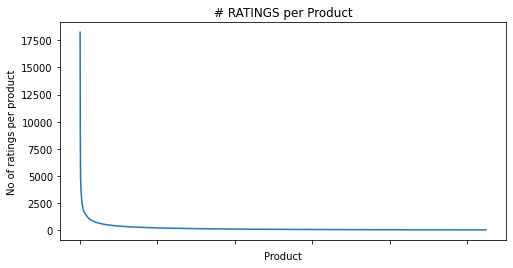

In [31]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [32]:
no_of_ratings_per_product.head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [33]:
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [34]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [35]:
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [36]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [37]:
ratings_mean_count.head()

,Rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211


In [38]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [39]:
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [40]:
ratings_mean_count['rating_counts'].max()

18244

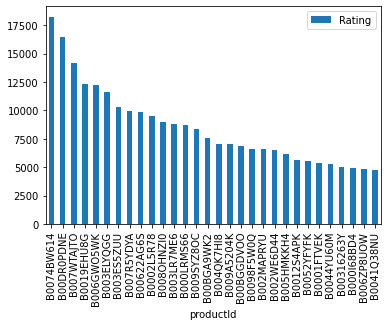

In [41]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [42]:
popular_products.head()

,Rating
productId,
0972683275,1051
1400501466,250
1400501520,82
1400501776,139
1400532620,171


# ***Collaborative Filtering (Item - Item recommendation)***

---

Checking up all the imports

In [6]:
!pip install surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading the Dataset

In [7]:
# new_df = review_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

Splitting the dataset

In [8]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

Using user based true/false to switch between user-based or item-based collaborative filtering

In [ ]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


Estimating biases using als.....
Computing the pearson_baseline similarity matrix....
Done computing similarity matrix.

<surprise.prediction_algorithms.knns.KNNWithMeans at 0x7fbc92233208>


Running the trained model against the testset

In [ ]:
test_pred = algo.test(testset)

In [ ]:
test_pred

Getting RMSE

In [ ]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model: Test Set

RMSE: 1.3436

1.343641161111319

# ***Model-based collaborative filtering system***

---


These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
new_df=review_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50) # Getting the new dataframe which contains users who has given 50 or more ratings
new_df1=new_df.head(10000) # taking a subset of the data, for the sake of demonstration
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0) # makes it easier to visualize, we also fill empty values to 0 in this step
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, since the user would not have given reviews for all the products. Thus, We have filled up the unknown values wth 0.

In [ ]:
ratings_matrix.shape # we check the dimension of the new dataset

(9832, 76)

Transposing the matrix, as the SVD model requires the product ID as rows and user IDs as columns.

In [ ]:
X = ratings_matrix.T # taking transpose of the data
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape # we notice that the dimension of the data has changed as we have done the transpose

(76, 9832)

Unique products in subset of data

In [ ]:
X1 = X # storing a copy of the new dataset before doing the SVD operation on it

In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10) # creating the SVD model object. n_components determines how many latent factors the model will try to find. 
                                    # The higher the number is, the more power the model has, but it also comes with a higher chance of overfitting.
decomposed_matrix = SVD.fit_transform(X) # applying the SVD model on the data X. we Fit the model to X and perform dimensionality reduction on X
decomposed_matrix.shape

(76, 10)

In [ ]:
#Correlation Matrix - Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

# after applying SVD to the data, we generate the correlation matrix, which would help us get the products to recommend corresponding to the product purchased in the table
correlation_matrix = np.corrcoef(decomposed_matrix) 
correlation_matrix.shape

(76, 76)

In [ ]:
X.index[75]

'B00000K135'

Index # of product ID purchased by customer

In [ ]:
i = "B00000K135" # here we take an example ID for product purchased, on the basis of which we wish to recommend more products.

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer, based on items rated by other customers, who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape 
# returns a single column dataset, with 76 rows of products. All of the rows will holds correlation value, on the basis of which we will decide

(76,)

Recommending top 25 highly correlated products in sequence

In [ ]:
# will return all the product IDs from the correlation matrix which have more than 0.65 value for correlation calculated by applying the SVD model
Recommend = list(X.index[correlation_product_ID > 0.65])
# Removes the item already bought by the customer, since it will have a 1 correlation value
Recommend.remove(i) 

Recommend[0:24] # outputting all the viable product IDs which we can recommend to the customer for purchasing the product with ID "B00000K135"

['1400501466',
 '1400501520',
 '1400501776',
 '1400532736',
 '1400698987',
 '6301977173',
 '9966694544',
 'B00000J05A',
 'B00000J0D2',
 'B00000J1QK',
 'B00000J1TX',
 'B00000J1U8',
 'B00000J3UJ',
 'B00000J4EY',
 'B00000J6WY',
 'B00000JD34',
 'B00000JMUG']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.